# Import libraries & GPU

In [ ]:
from fastai.tabular import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
import torch
from sklearn.utils import shuffle
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Download datasets

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
feature_path = '/content/drive/MyDrive/ISS Assignment 2/new_peminer_train_features.npy'
label_path = '/content/drive/MyDrive/ISS Assignment 2/new_peminer_train_labels.npy'

In [ ]:
# data load

peminer_header = ['ADVAP132.DLL', 'AWFAXP32.DLL', 'AWFXAB32.DLL', 'AWPWD32.DLL', 'AWRESX32.DLL', 'AWUTIL32.DLL', 'BHNETB.DLL', 'BHSUPP.DLL', 'CCAPI.DLL', 'CCEI.DLL', 'CCPSH.DLL', 'CCTN20.DLL', 'CMC.DLL', 'COMCTL32.DLL', 'COMDLG32.DLL', 'CRTDLL.DLL', 'DCIMAN.DLL', 'DCIMAN32.DLL', 'DSKMAINT.DLL', 'FileHeader.Characteristics', 'FileHeader.Machine', 'FileHeader.NumberOfSections', 'FileHeader.NumberOfSymbols', 'FileHeader.PointerToSymbolTable', 'FileHeader.SizeOfOptionalHeader', 'FileHeader.TimeDateStamp', 'GDI32.DLL', 'GROUP.DLL', 'HYPERTERM.DLL', 'KERNL32.DLL', 'LZ32.DLL', 'MAPI.DLL', 'MAPI32.DLL', 'MFC30.DLL', 'MPR.DLL', 'MSFS32.DLL', 'MSNDUI.DLL', 'MSNET32.DLL', 'MSPST32.DLL', 'MSSHRUI.DLL', 'MSVIEWUT.DLL', 'NAL.DLL', 'NDIS30.DLL', 'NETAPI.DLL', 'NETAPI32.DLL', 'NETBIOS.DLL', 'NETDI.DLL', 'NETSETUP.DLL', 'NWAB32.DLL', 'NWNET32.DLL', 'NWNP32.DLL', 'OLEDLG.DLL', 'OptionalHeader.AddressOfEntryPoint', 'OptionalHeader.BaseOfCode', 'OptionalHeader.BaseOfData', 'OptionalHeader.CheckSum', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.VirtualAddress', 'OptionalHeader.DllCharacteristics', 'OptionalHeader.FileAlignment', 'OptionalHeader.ImageBase', 'OptionalHeader.LoaderFlags', 'OptionalHeader.Magic', 'OptionalHeader.MajorImageVersion', 'OptionalHeader.MajorLinkerVersion', 'OptionalHeader.MajorOperatingSystemVersion', 'OptionalHeader.MajorSubsystemVersion', 'OptionalHeader.MinorImageVersion', 'OptionalHeader.MinorLinkerVersion', 'OptionalHeader.MinorOperatingSystemVersion', 'OptionalHeader.MinorSubsystemVersion', 'OptionalHeader.NumberOfRvaAndSizes', 'OptionalHeader.Reserved1', 'OptionalHeader.SectionAlignment', 'OptionalHeader.SizeOfCode', 'OptionalHeader.SizeOfHeaders', 'OptionalHeader.SizeOfHeapCommit', 'OptionalHeader.SizeOfHeapReserve', 'OptionalHeader.SizeOfImage', 'OptionalHeader.SizeOfInitializedData', 'OptionalHeader.SizeOfStackCommit', 'OptionalHeader.SizeOfStackReserve', 'OptionalHeader.SizeOfUninitializedData', 'OptionalHeader.Subsystem', 'POWERCFG.DLL', 'RASAPI16.DLL', 'RASAPI32.DLL', 'RASPI.DLL', 'RPCLTC1.DLL', 'RPCNS4.DLL', 'RPCRT4.DLL', 'RPCTLC3.DLL', 'RPCTLC5.DLL', 'RPCTLC6.DLL', 'RPCTLS3.DLL', 'RPCTLS5.DLL', 'RPCTLS6.DLL', 'RSRC32.DLL', 'Resource.Characteristics', 'Resource.MajorVersion', 'Resource.MinorVersion', 'Resource.NumberOfIdEntries', 'Resource.NumberOfNamedEntries', 'Resource.RT_ACCELERATOR', 'Resource.RT_BITMAP', 'Resource.RT_CURSOR', 'Resource.RT_DIALOG', 'Resource.RT_DLGINCLUDE', 'Resource.RT_FONT', 'Resource.RT_FONTDIR', 'Resource.RT_GROUP_CURSOR', 'Resource.RT_GROUP_ICON', 'Resource.RT_ICON', 'Resource.RT_MENU', 'Resource.RT_MESSAGETABLE', 'Resource.RT_RCDATA', 'Resource.RT_STRING', 'Resource.RT_VERSION', 'Resource.TimeDateStamp', 'SAPNSP.DLL', 'SECUR32.DLL', 'SHELL32.DLL', 'SHLWAPI.DLL', 'SLENH.DLL', 'Section.data.Characteristics', 'Section.data.NumberOfLinenumbers', 'Section.data.NumberOfRelocations', 'Section.data.PointerToLinenumbers', 'Section.data.PointerToRawData', 'Section.data.PointerToRelocations', 'Section.data.SizeOfRawData', 'Section.data.VirtualAddress', 'Section.data.VirtualSize', 'Section.rsrc.Characteristics', 'Section.rsrc.NumberOfLinenumbers', 'Section.rsrc.NumberOfRelocations', 'Section.rsrc.PointerToLinenumbers', 'Section.rsrc.PointerToRawData', 'Section.rsrc.PointerToRelocations', 'Section.rsrc.SizeOfRawData', 'Section.rsrc.VirtualAddress', 'Section.rsrc.VirtualSize', 'Section.text.Characteristics', 'Section.text.NumberOfLinenumbers', 'Section.text.NumberOfRelocations', 'Section.text.PointerToLinenumbers', 'Section.text.PointerToRawData', 'Section.text.PointerToRelocations', 'Section.text.SizeOfRawData', 'Section.text.VirtualAddress', 'Section.text.VirtualSize', 'UMDM32.DLL', 'USER32.DLL', 'VERSION.DLL', 'WININET.DLL', 'WINMM.DLL', 'WINREG.DLL', 'WINSOCK.DLL', 'WS2.DLL', 'WSOCK32.DLL']

df = pd.DataFrame(np.load(feature_path), columns=peminer_header)
labels = np.load(label_path)
X, Y = df, labels

In [ ]:
# function to split-out validation set

def splitDataset(df):
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, shuffle = True, stratify = Y, random_state = random_seed)
    return X_train, X_validation, Y_train, Y_validation

# Multi-class Classification
splitDataset()을 이용하면 랜덤한 dataset 조각을 얻을 수 있다. (shuffle = True)

이를 이용해 여러 Model을 시도하면서 classification을 시도한다.

이 중 가장 정확도가 좋은 방법을 사용할 예정이다.

In [ ]:
# function for comparing models' results, accuracies, classifiers
def runExperiments(X_train, Y_train):
    random_seed = 100
    scoring = 'accuracy'
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='auto')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC(gamma='auto')))
    models.append(('AB', AdaBoostClassifier(n_estimators=100)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(n_estimators=10)))

    # evaluate each model in turn using 10-fold cross-validation
    results = []
    classifiers = []
    accuracies = []
    for classifier, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=random_seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        accuracies.append((cv_results.mean(), classifier))
        results.append(cv_results)
        classifiers.append(classifier)
        msg = "%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std())
        print(msg)
    return results, accuracies, classifiers

In [ ]:
#get dataset for train
X_train, X_validation, Y_train, Y_validation = splitDataset(df)

#test with train dataset
results, accuracies, classifiers = runExperiments(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

LR: 0.819500 (0.006902)
LDA: 0.836250 (0.008714)
KNN: 0.921500 (0.007122)
CART: 0.936875 (0.006737)
NB: 0.331875 (0.010972)
SVM: 0.720125 (0.010296)
AB: 0.904625 (0.006704)
DT: 0.936562 (0.006604)
RF: 0.950062 (0.005991)


# Select the Best one
Model들 사이의 제대로 된 비교를 위해 시각화 해보자

In [ ]:
# function for comparing models in visual way
def compareModels(accuracies, results, classifiers):
    # sort the mean accuracy  and print
    accuracies.sort(reverse=True)
    for acc, cls in accuracies:
        print("{} {:.2f}".format(cls, acc))
    # Compare Algorithms with box-plot
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()

RF 0.95
CART 0.94
DT 0.94
KNN 0.92
AB 0.90
LDA 0.84
LR 0.82
SVM 0.72
NB 0.33


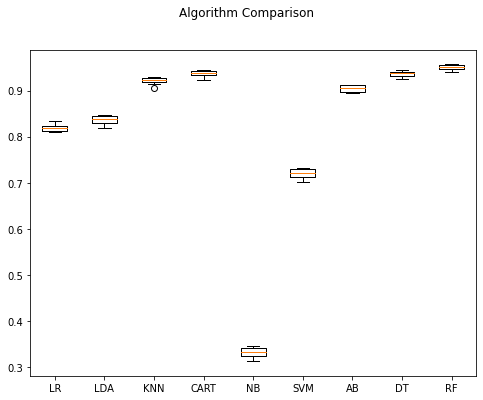

In [ ]:
compareModels(accuracies, results, classifiers)

# Test the Best one
위에서 확인할 수 있듯이 Random Forest가 가장 정확도가 좋다.

가장 성과가 좋은 모델을 validation set을 이용해서 다시 한 번 검증해보자.

In [ ]:
#function to get predictions
def testBestModel(model, X_test, Y_test):
    # predict with validation dataset
    Y_predictions = rf.predict(X_test)
    print("Accuracy = {:.2f}".format(accuracy_score(Y_test, Y_predictions)))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, Y_predictions))
    print('Classification Report:')
    print(classification_report(Y_test, Y_predictions))
    return Y_predictions

In [ ]:
# check the best model's validation accuracy and confusion matrix
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
Y_predictions = testBestModel(rf, X_validation, Y_validation)

Accuracy = 0.95
Confusion Matrix:
[[1090  110]
 [  81 2719]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1200
           1       0.96      0.97      0.97      2800

    accuracy                           0.95      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.95      0.95      4000



Accuracy도 Confusion Matrix도 모두 양호해 보인다.

이 모델을 사용해서 test dataset을 예측할 것이다.

# Prediction
만들어진 모델을 사용해서 test dataset을 예측해보자.

### Download testset

In [ ]:
# mount already done
test_path = '/content/drive/MyDrive/ISS Assignment 2/new_peminer_test_features.npy'

peminer_header = ['ADVAP132.DLL', 'AWFAXP32.DLL', 'AWFXAB32.DLL', 'AWPWD32.DLL', 'AWRESX32.DLL', 'AWUTIL32.DLL', 'BHNETB.DLL', 'BHSUPP.DLL', 'CCAPI.DLL', 'CCEI.DLL', 'CCPSH.DLL', 'CCTN20.DLL', 'CMC.DLL', 'COMCTL32.DLL', 'COMDLG32.DLL', 'CRTDLL.DLL', 'DCIMAN.DLL', 'DCIMAN32.DLL', 'DSKMAINT.DLL', 'FileHeader.Characteristics', 'FileHeader.Machine', 'FileHeader.NumberOfSections', 'FileHeader.NumberOfSymbols', 'FileHeader.PointerToSymbolTable', 'FileHeader.SizeOfOptionalHeader', 'FileHeader.TimeDateStamp', 'GDI32.DLL', 'GROUP.DLL', 'HYPERTERM.DLL', 'KERNL32.DLL', 'LZ32.DLL', 'MAPI.DLL', 'MAPI32.DLL', 'MFC30.DLL', 'MPR.DLL', 'MSFS32.DLL', 'MSNDUI.DLL', 'MSNET32.DLL', 'MSPST32.DLL', 'MSSHRUI.DLL', 'MSVIEWUT.DLL', 'NAL.DLL', 'NDIS30.DLL', 'NETAPI.DLL', 'NETAPI32.DLL', 'NETBIOS.DLL', 'NETDI.DLL', 'NETSETUP.DLL', 'NWAB32.DLL', 'NWNET32.DLL', 'NWNP32.DLL', 'OLEDLG.DLL', 'OptionalHeader.AddressOfEntryPoint', 'OptionalHeader.BaseOfCode', 'OptionalHeader.BaseOfData', 'OptionalHeader.CheckSum', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BASERELOC.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_BOUND_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_COM_DESCRIPTOR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DEBUG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_DELAY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXCEPTION.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_EXPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_GLOBALPTR.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IAT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_IMPORT.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_LOAD_CONFIG.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESERVED.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_RESOURCE.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_SECURITY.VirtualAddress', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.Size', 'OptionalHeader.DataDirectory.IMAGE_DIRECTORY_ENTRY_TLS.VirtualAddress', 'OptionalHeader.DllCharacteristics', 'OptionalHeader.FileAlignment', 'OptionalHeader.ImageBase', 'OptionalHeader.LoaderFlags', 'OptionalHeader.Magic', 'OptionalHeader.MajorImageVersion', 'OptionalHeader.MajorLinkerVersion', 'OptionalHeader.MajorOperatingSystemVersion', 'OptionalHeader.MajorSubsystemVersion', 'OptionalHeader.MinorImageVersion', 'OptionalHeader.MinorLinkerVersion', 'OptionalHeader.MinorOperatingSystemVersion', 'OptionalHeader.MinorSubsystemVersion', 'OptionalHeader.NumberOfRvaAndSizes', 'OptionalHeader.Reserved1', 'OptionalHeader.SectionAlignment', 'OptionalHeader.SizeOfCode', 'OptionalHeader.SizeOfHeaders', 'OptionalHeader.SizeOfHeapCommit', 'OptionalHeader.SizeOfHeapReserve', 'OptionalHeader.SizeOfImage', 'OptionalHeader.SizeOfInitializedData', 'OptionalHeader.SizeOfStackCommit', 'OptionalHeader.SizeOfStackReserve', 'OptionalHeader.SizeOfUninitializedData', 'OptionalHeader.Subsystem', 'POWERCFG.DLL', 'RASAPI16.DLL', 'RASAPI32.DLL', 'RASPI.DLL', 'RPCLTC1.DLL', 'RPCNS4.DLL', 'RPCRT4.DLL', 'RPCTLC3.DLL', 'RPCTLC5.DLL', 'RPCTLC6.DLL', 'RPCTLS3.DLL', 'RPCTLS5.DLL', 'RPCTLS6.DLL', 'RSRC32.DLL', 'Resource.Characteristics', 'Resource.MajorVersion', 'Resource.MinorVersion', 'Resource.NumberOfIdEntries', 'Resource.NumberOfNamedEntries', 'Resource.RT_ACCELERATOR', 'Resource.RT_BITMAP', 'Resource.RT_CURSOR', 'Resource.RT_DIALOG', 'Resource.RT_DLGINCLUDE', 'Resource.RT_FONT', 'Resource.RT_FONTDIR', 'Resource.RT_GROUP_CURSOR', 'Resource.RT_GROUP_ICON', 'Resource.RT_ICON', 'Resource.RT_MENU', 'Resource.RT_MESSAGETABLE', 'Resource.RT_RCDATA', 'Resource.RT_STRING', 'Resource.RT_VERSION', 'Resource.TimeDateStamp', 'SAPNSP.DLL', 'SECUR32.DLL', 'SHELL32.DLL', 'SHLWAPI.DLL', 'SLENH.DLL', 'Section.data.Characteristics', 'Section.data.NumberOfLinenumbers', 'Section.data.NumberOfRelocations', 'Section.data.PointerToLinenumbers', 'Section.data.PointerToRawData', 'Section.data.PointerToRelocations', 'Section.data.SizeOfRawData', 'Section.data.VirtualAddress', 'Section.data.VirtualSize', 'Section.rsrc.Characteristics', 'Section.rsrc.NumberOfLinenumbers', 'Section.rsrc.NumberOfRelocations', 'Section.rsrc.PointerToLinenumbers', 'Section.rsrc.PointerToRawData', 'Section.rsrc.PointerToRelocations', 'Section.rsrc.SizeOfRawData', 'Section.rsrc.VirtualAddress', 'Section.rsrc.VirtualSize', 'Section.text.Characteristics', 'Section.text.NumberOfLinenumbers', 'Section.text.NumberOfRelocations', 'Section.text.PointerToLinenumbers', 'Section.text.PointerToRawData', 'Section.text.PointerToRelocations', 'Section.text.SizeOfRawData', 'Section.text.VirtualAddress', 'Section.text.VirtualSize', 'UMDM32.DLL', 'USER32.DLL', 'VERSION.DLL', 'WININET.DLL', 'WINMM.DLL', 'WINREG.DLL', 'WINSOCK.DLL', 'WS2.DLL', 'WSOCK32.DLL']

test_df =  pd.DataFrame(np.load(test_path), columns=peminer_header)
X_test = test_df

In [ ]:
X_test

,ADVAP132.DLL,AWFAXP32.DLL,AWFXAB32.DLL,AWPWD32.DLL,AWRESX32.DLL,AWUTIL32.DLL,BHNETB.DLL,BHSUPP.DLL,CCAPI.DLL,CCEI.DLL,...,Section.text.VirtualSize,UMDM32.DLL,USER32.DLL,VERSION.DLL,WININET.DLL,WINMM.DLL,WINREG.DLL,WINSOCK.DLL,WS2.DLL,WSOCK32.DLL
0,0,0,0,0,0,0,0,0,0,0,...,5660,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,68500,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,13060,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,9224,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1364,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,1388068,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,1272839,0,1,1,1,1,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,756976,0,1,1,1,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,538363,0,1,0,0,1,0,0,0,0


In [ ]:
# prediction with test dataset
rf = RandomForestClassifier(n_estimators=10)

#fit the model with train dataset
rf.fit(X_train, Y_train)

#predict with test dataset
Y_predictions = rf.predict(X_test)

## Save predictions as csv

In [ ]:
pred = pd.DataFrame(Y_predictions)

In [ ]:
pred

,0
0,1
1,1
2,1
3,0
4,0
...,...
19995,0
19996,1
19997,1
19998,0


In [ ]:
# download as csv file
from google.colab import files
pred.to_csv('pred.csv')
files.download('pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>